In [2]:
library(tidyverse)
options(repr.plot.height=6, repr.plot.width=10)
theme_set(theme_classic())

‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.4     ‚úî readr     2.1.5
‚úî forcats   1.0.0     ‚úî stringr   1.5.1
‚úî ggplot2   3.4.0     ‚úî tibble    3.2.1
‚úî lubridate 1.9.3     ‚úî tidyr     1.3.1
‚úî purrr     1.0.2     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# STATS 504 
## Week 5: Solar weather and GOES data

## Space weather
https://www.youtube.com/watch?v=oOXVZo7KikE

## About the data source
- The Geostationary Operational Environmental Satellites (GOES) are a series of satellites in geostationary orbit.
- They collect:
    - [Terrestrial weather data](https://www.star.nesdis.noaa.gov/goes/) (cloud cover, storms, hurricanes, etc.)
    - Atmospheric observations (temperature, humidity, solar radiation)
    - [Space weather data](https://www.swpc.noaa.gov/products/goes-x-ray-flux) (our focus)

# Understanding GOES X-ray Flux Measurements

- There are two GOES measurements:
  - Flux1 (Short Channel): Captures higher-energy X-rays with shorter wavelengths (0.5‚Äì4.0 √Ö). Sensitive to more intense solar events.
  - Flux2 (Long Channel): Captures lower-energy X-rays with longer wavelengths (1.0‚Äì8.0 √Ö). Used to classify solar flares.
- The Flux2 measurement is primarily used for classifying the magnitude of solar flares (e.g., C-class, M-class, X-class) based on the peak flux level.
- The ratio of Flux1 to Flux2 can provide insights into the temperature and emission characteristics of the solar plasma during flare events.

## The raw data
(Importing in R turned out to be difficult so I [switched over to Python](prep.ipynb))

In [27]:
df <- arrow::read_feather("goes2018.feather")  # not posted to github, too large


In [28]:
df %>% 
    mutate(t = lubridate::make_date(Year, Month, Day),
              t = t + dseconds(Time)             
             ) -> df

# (Too) big data
- We can already see that the data are very large and contain a lot of noise. This will make analysis complicated.
- We can effectively deal with both problems by averaging.


In [32]:
library(slider)

df_smoothed <- df %>% 
    filter(Month == 1, Day == 1) %>% 
    ggplot(aes(x = t, y = Flux2)) + geom_line()

In [38]:
library(slider)

df %>% 
    filter(Month == 1, Day == 1) %>% 
    mutate(Flux2_smooth = slide_dbl(Flux2, mean, .before = 10000, .after = 10000)) %>% 
    sample_frac(.01) %>% 
    ggplot(aes(x = t, y = Flux2_smooth)) + geom_line()

## Daily averages
To get a very "high" level picture of the data, we can do the usual thing and summarize by each day:

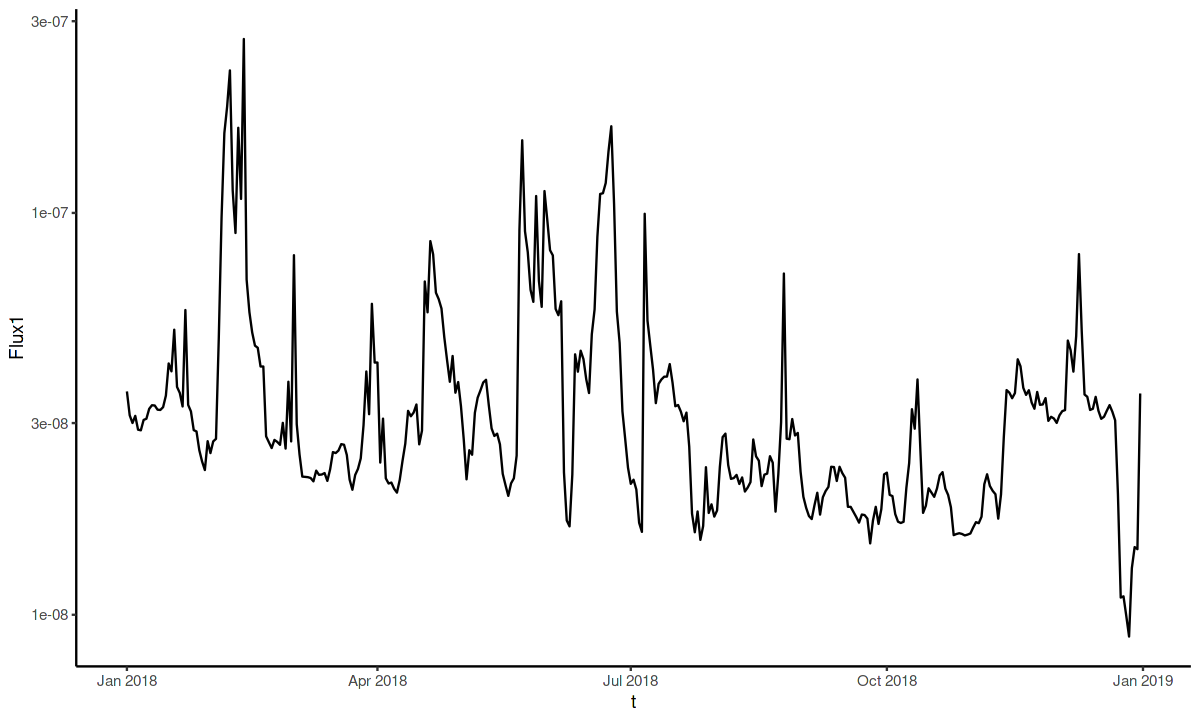

In [7]:
# a summarized view

For the rest of the lecture, we'll work with data summarized by daily average:

In [93]:
# goes_daily <- arrow::read_feather('goes_daily.feather') %>% mutate(date = make_datetime(year, month, day))
# save(goes_daily, file="goes_daily.RData")

In [96]:
load(url('https://github.com/terhorst/stats504/raw/refs/heads/main/lectures/week5/goes_daily_2.RData'))
goes_daily %>% print

              t  sat   flux1_mean   flux2_mean flux1_logmean flux2_logmean
0    1980-01-04 go02 1.726347e-06 2.379783e-08    -13.315640     -17.94168
1    1980-01-05 go02 1.691449e-06 2.569799e-08    -13.333417     -17.97886
2    1980-01-06 go02 3.479739e-06 2.761435e-07    -12.904953     -17.25269
3    1980-01-07 go02 3.347606e-06 1.735538e-07    -13.002044     -17.45621
4    1980-01-08 go02 4.204871e-06 3.946333e-07    -12.830895     -16.87275
5    1980-01-09 go02 2.762496e-06 1.647243e-07    -13.011159     -17.99093
6    1980-01-10 go02 5.609191e-06 5.243886e-07    -12.531193     -16.70821
7    1980-01-11 go02 3.473751e-06 1.036893e-07    -12.691345     -16.98271
8    1980-01-12 go02 4.852758e-06 2.243373e-07    -12.384569     -16.16959
9    1980-01-13 go02 5.314279e-06 3.563169e-07    -12.457948     -16.30301
10   1980-01-14 go02 4.128042e-06 2.834238e-07    -12.938496     -17.46382
11   1980-01-15 go02 1.985840e-06 3.349303e-08    -13.260713     -17.97018
12   1980-01-16 go02 1.58

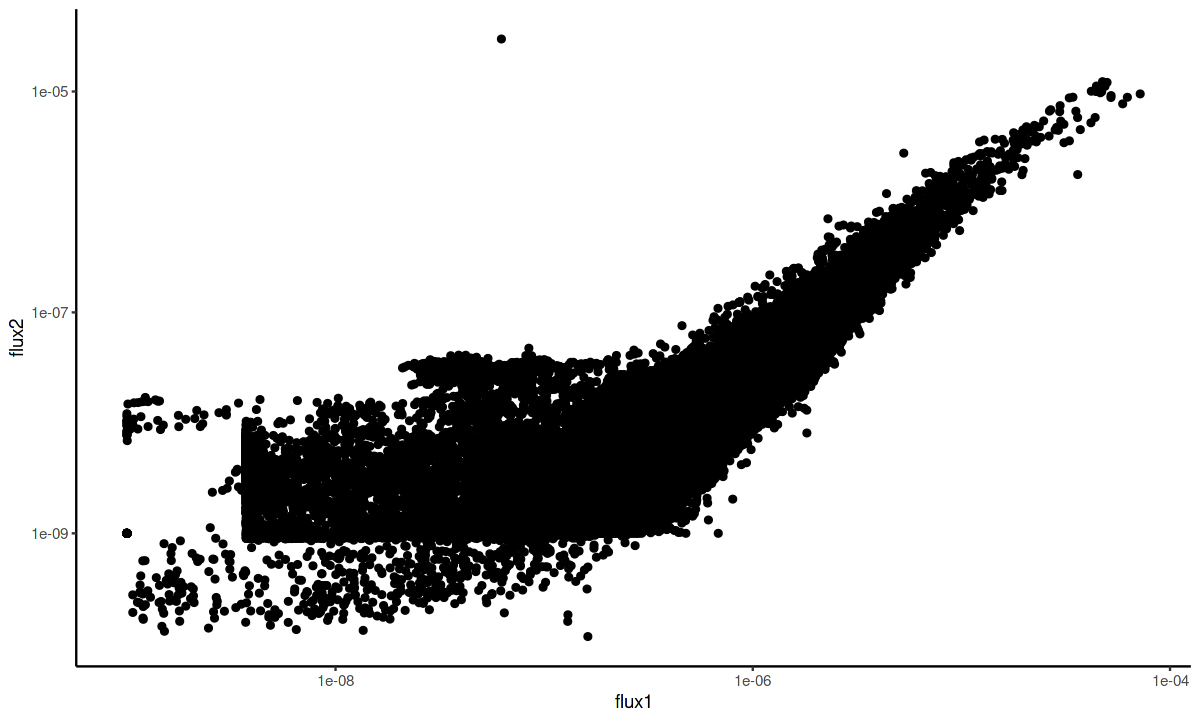

In [51]:
# The raw data
goes_daily %>% 
    filter(pmax(flux1, flux2) <= 1e-3) %>% 
    ggplot + geom_point(aes(x=flux1, y=flux2)) + scale_x_log10() + scale_y_log10()

# Some key questions
- Outliers?
- Missing data?
- What is the relationship between Flux1 and Flux2 (if any)?

In [97]:
goes_daily %>% pivot_longer(flux1:flux2) %>% print

# A tibble: 43,092 √ó 7
    year month   day sat   date                name         value
   <int> <int> <int> <fct> <dttm>              <chr>        <dbl>
 1  1980     1     4 go02  1980-01-04 00:00:00 flux1 0.00000173  
 2  1980     1     4 go02  1980-01-04 00:00:00 flux2 0.0000000238
 3  1980     1     5 go02  1980-01-05 00:00:00 flux1 0.00000169  
 4  1980     1     5 go02  1980-01-05 00:00:00 flux2 0.0000000257
 5  1980     1     6 go02  1980-01-06 00:00:00 flux1 0.00000348  
 6  1980     1     6 go02  1980-01-06 00:00:00 flux2 0.000000276 
 7  1980     1     7 go02  1980-01-07 00:00:00 flux1 0.00000335  
 8  1980     1     7 go02  1980-01-07 00:00:00 flux2 0.000000174 
 9  1980     1     8 go02  1980-01-08 00:00:00 flux1 0.00000420  
10  1980     1     8 go02  1980-01-08 00:00:00 flux2 0.000000395 
# ‚Ñπ 43,082 more rows


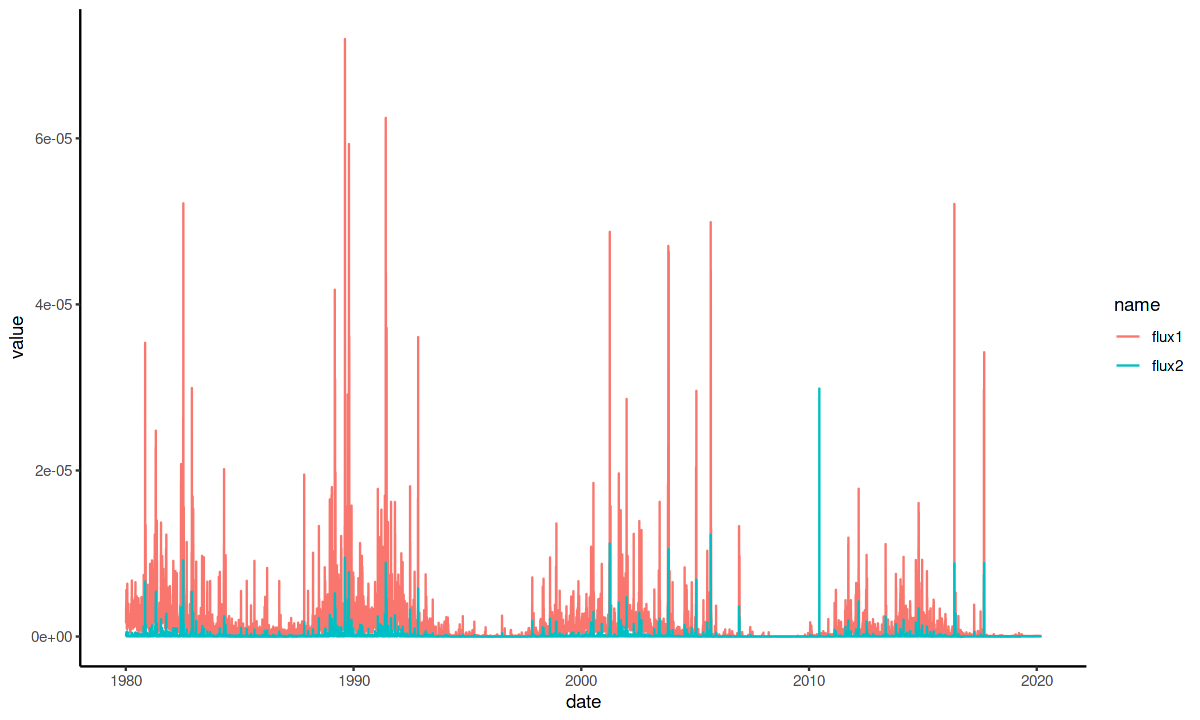

In [63]:
goes_daily %>% 
    filter(pmax(flux1, flux2) < 1e-3) %>% 
    pivot_longer(flux1:flux2) %>% 
    ggplot + 
    geom_line(aes(x = date, y = value, color = name))

## What is the distribution of Flux? 
- What is the marginal distribution of Flux1/Flux2?
- What is their joint distribution?
- Are these distributions constant over time?
- How do `time`, `Sat` and `name` enter into the picture?

## Marginal distributions

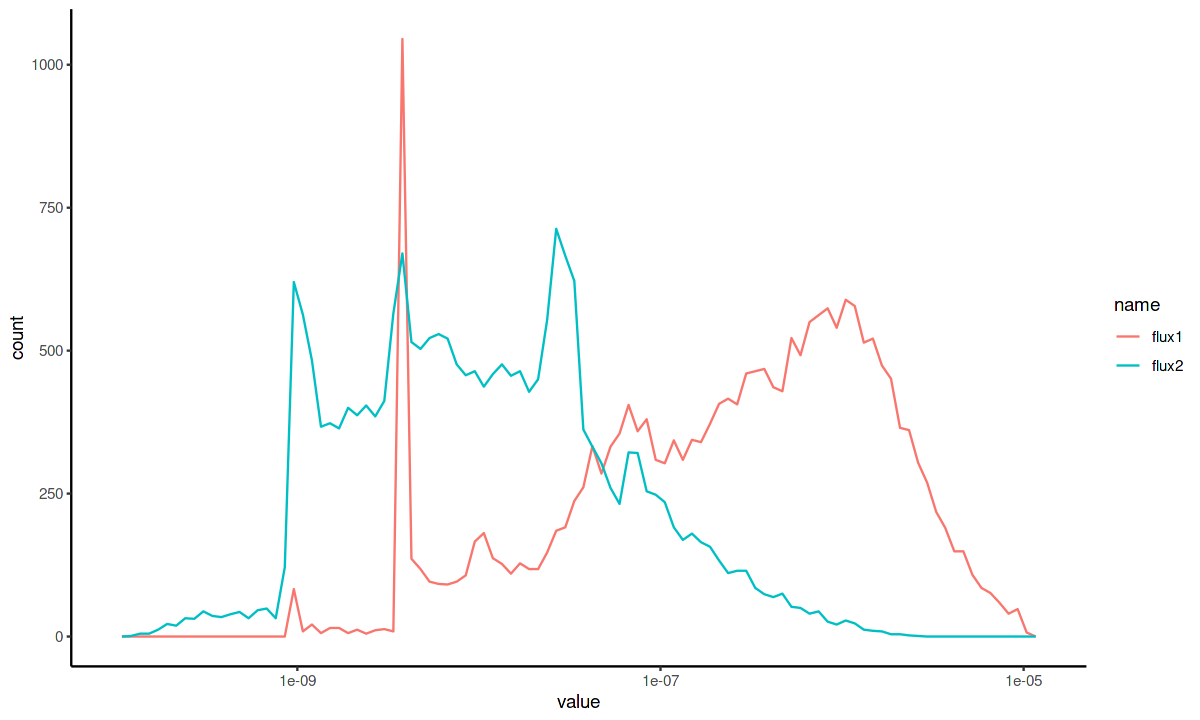

In [78]:
goes_daily %>% 
    filter(pmax(flux1, flux2) < 1e-5) %>%
    pivot_longer(flux1:flux2) %>% 
    ggplot() + geom_freqpoly(aes(x=value, color=name), bins = 100) +
    scale_x_log10()

## Joint distributions
How are `flux1` and `flux2` jointly distributed?

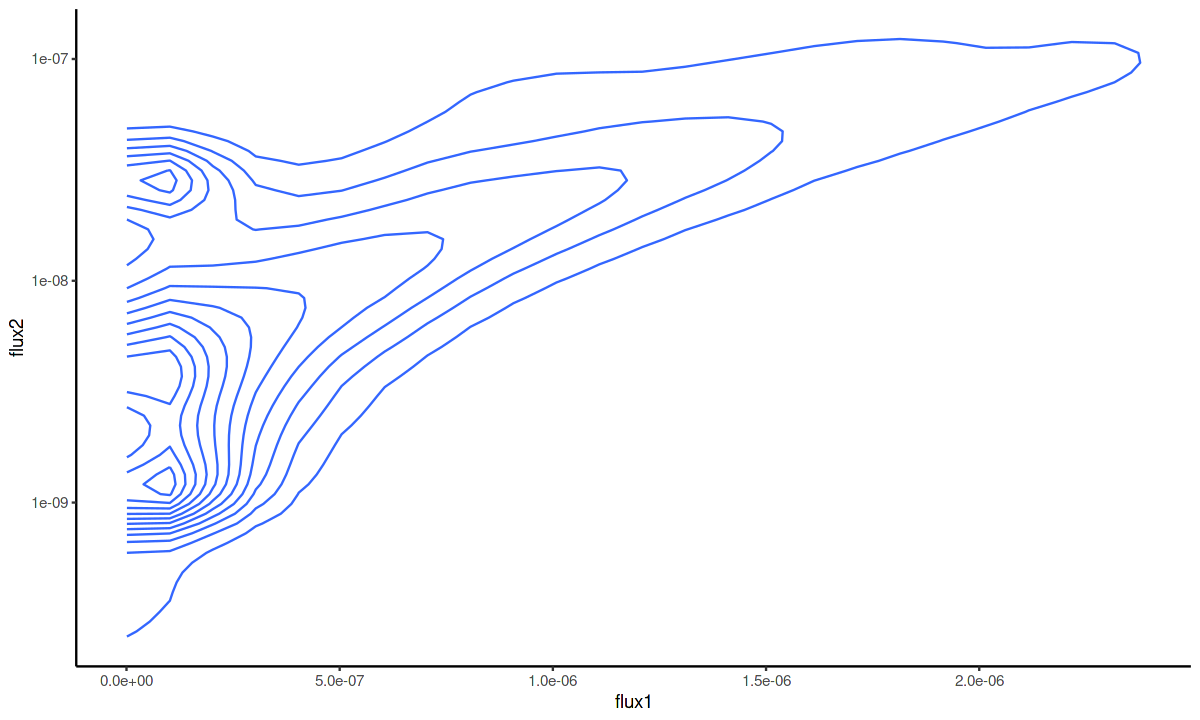

In [81]:
goes_daily %>%  
    filter(pmax(flux1, flux2) < 1e-5) %>% 
    ggplot + geom_density_2d(aes(x=flux1, y=flux2)) + 
    scale_y_log10()

## Variation over time
Is the distribution of the data constant across time?

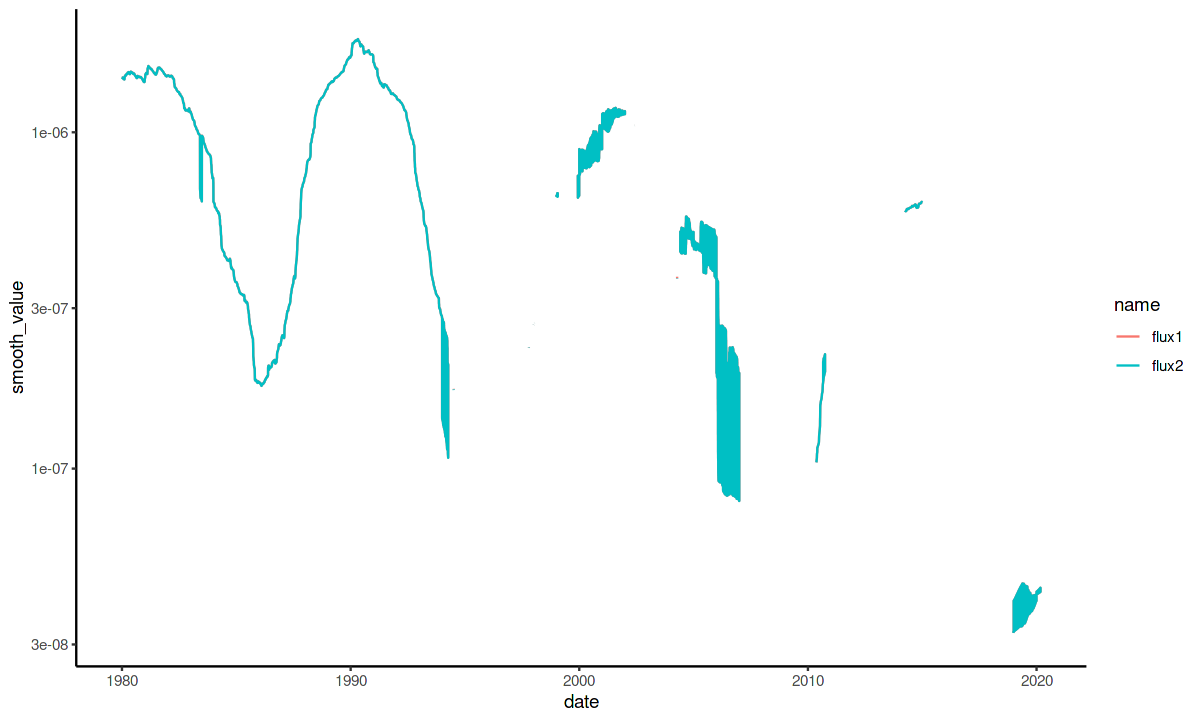

In [85]:
goes_daily %>% pivot_longer(flux1:flux2) %>% 
    mutate(value = ifelse(value > 1e-4, NA, value)) %>%  
    mutate(smooth_value = slide_dbl(value, mean, .before = 1000, .after = 1000)) %>% 
    ggplot + geom_line(aes(x = date, y = smooth_value, color = name)) +
    scale_y_log10()

In [99]:
goes_daily

t          sat  flux1_mean   flux2_mean   flux1_logmean flux2_logmean
0     1980-01-04 go02 1.726347e-06 2.379783e-08 -13.31564     -17.94168    
1     1980-01-05 go02 1.691449e-06 2.569799e-08 -13.33342     -17.97886    
2     1980-01-06 go02 3.479739e-06 2.761435e-07 -12.90495     -17.25269    
3     1980-01-07 go02 3.347606e-06 1.735538e-07 -13.00204     -17.45621    
4     1980-01-08 go02 4.204871e-06 3.946333e-07 -12.83090     -16.87275    
5     1980-01-09 go02 2.762496e-06 1.647243e-07 -13.01116     -17.99093    
6     1980-01-10 go02 5.609191e-06 5.243886e-07 -12.53119     -16.70821    
7     1980-01-11 go02 3.473751e-06 1.036893e-07 -12.69135     -16.98271    
8     1980-01-12 go02 4.852758e-06 2.243373e-07 -12.38457     -16.16959    
9     1980-01-13 go02 5.314279e-06 3.563169e-07 -12.45795     -16.30301    
10    1980-01-14 go02 4.128042e-06 2.834238e-07 -12.93850     -17.46382    
11    1980-01-15 go02 1.985840e-06 3.349303e-08 -13.26071     -17.97018    
12    1980-01-16 go02 1.586261e-06 3.891412e-08 -13.41285     -17.87859    
13    1980-01-17 go02 1.122163e-06 1.454330e-08 -13.72150     -18.40361    
14    1980-01-18 go02 9.492682e-07 1.117081e-08 -13.92606     -18.55356    
15    1980-01-19 go02 1.001702e-06 1.691583e-08 -14.01499     -18.57705    
16    1980-01-20 go02 8.935559e-07 1.536254e-08 -14.16250     -18.77126    
17    1980-01-21 go02 2.262027e-06 1.443356e-07 -13.97155     -18.36378    
18    1980-01-22 go02 1.167424e-06 3.289556e-08 -13.73439     -18.05405    
19    1980-01-23 go02 1.507435e-06 3.078267e-08 -13.57819     -17.68348    
20    1980-01-24 go02 2.375231e-06 6.967727e-08 -13.06746     -16.94607    
21    1980-01-25 go02 6.362433e-06 6.102908e-07 -12.74720     -16.87538    
22    1980-01-26 go02 4.048603e-06 1.038634e-07 -12.69892     -16.77017    
23    1980-02-05 go02 3.120795e-06 1.531436e-07 -12.91866     -17.06366    
24    1980-02-06 go02 3.588308e-06 2.069062e-07 -12.79963     -16.86682    
25    1980-02-07 go02 2.158531e-06 8.097738e-08 -13.18377     -17.53408    
26    1980-02-08 go02 3.619421e-06 4.341758e-07 -13.20590     -17.64971    
27    1980-02-09 go02 1.777612e-06 4.455836e-08 -13.32996     -17.91862    
28    1980-02-10 go02 2.776463e-06 9.437709e-08 -12.97987     -17.44691    
29    1980-02-11 go02 3.966045e-06 2.140051e-07 -12.99973     -17.86613    
‚ãÆ     ‚ãÆ          ‚ãÆ    ‚ãÆ            ‚ãÆ            ‚ãÆ             ‚ãÆ            
21295 2020-02-04 go15 8.226191e-08 3.620735e-08 -16.31445     -17.13745    
21296 2020-02-05 go15 8.195432e-08 3.566684e-08 -16.31815     -17.15135    
21297 2020-02-06 go15 8.285011e-08 3.640930e-08 -16.30726     -17.13129    
21298 2020-02-07 go15 8.708287e-08 4.052209e-08 -16.25781     -17.02894    
21299 2020-02-08 go15 8.760082e-08 3.805819e-08 -16.25142     -17.08641    
21300 2020-02-09 go15 8.418374e-08 3.747843e-08 -16.29114     -17.10150    
21301 2020-02-10 go15 8.400102e-08 3.750300e-08 -16.29327     -17.10144    
21302 2020-02-11 go15 8.158183e-08 3.551346e-08 -16.32257     -17.15500    
21303 2020-02-12 go15 8.152226e-08 3.609143e-08 -16.32338     -17.14024    
21304 2020-02-13 go15 8.071805e-08 3.531940e-08 -16.33317     -17.16043    
21305 2020-02-14 go15 7.982703e-08 3.490892e-08 -16.34438     -17.17220    
21306 2020-02-15 go15 8.005710e-08 3.502289e-08 -16.34161     -17.17166    
21307 2020-02-16 go15 7.949768e-08 3.425460e-08 -16.34850     -17.19111    
21308 2020-02-17 go15 7.960685e-08 3.381594e-08 -16.34714     -17.20407    
21309 2020-02-18 go15 8.172748e-08 4.069465e-08 -16.32166     -17.03716    
21310 2020-02-19 go15 8.353037e-08 3.757586e-08 -16.29958     -17.10669    
21311 2020-02-20 go15 8.398910e-08 3.745041e-08 -16.29350     -17.10384    
21312 2020-02-21 go15 8.363068e-08 3.680026e-08 -16.29845     -17.12302    
21313 2020-02-22 go15 9.004921e-08 3.641958e-08 -16.22372     -17.13176    
21314 2020-02-23 go15 8.985280e-08 3.624861e-08 -16.22583     -17.13474    
21315 2020-02-24 go15 8.625042e-08 3.354

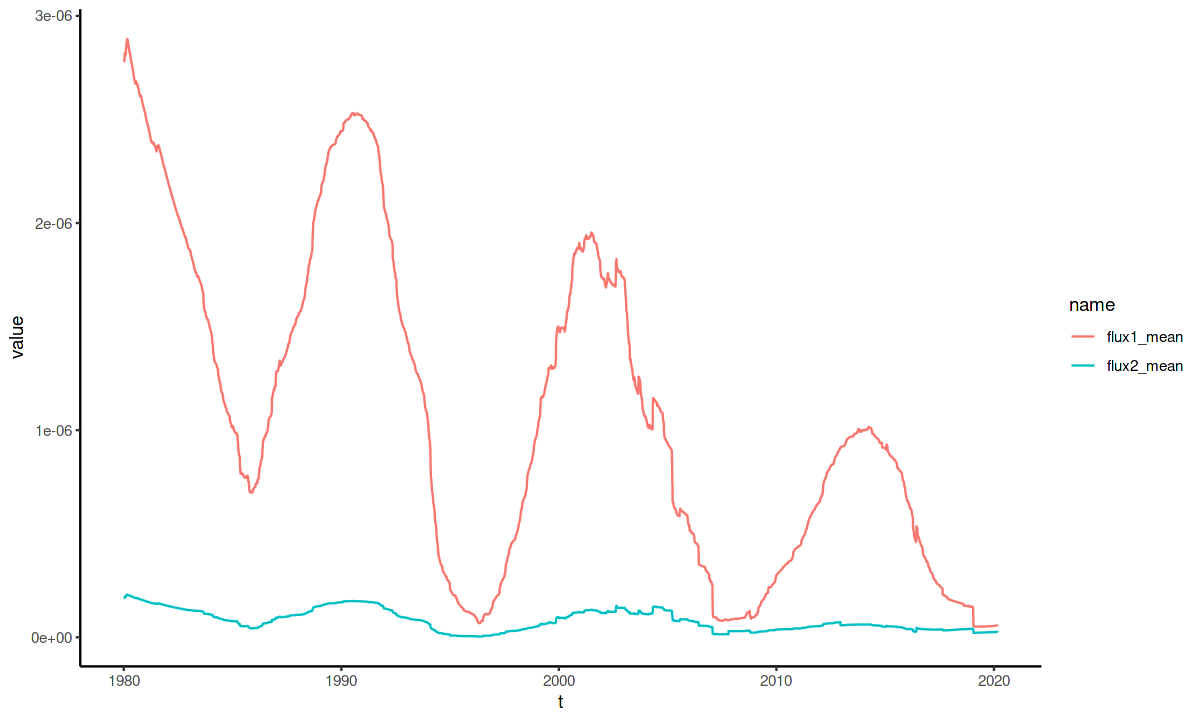

In [101]:
library(slider)

goes_daily %>% pivot_longer(flux1_mean:flux2_mean) %>% 
    group_by(name) %>% arrange(t) %>% 
    mutate(value = ifelse(value > 1e-4, NA, value)) %>% 
    mutate(value = slide_dbl(value, \(v) mean(v, na.rm = T), .before=1000, .after=1000)) %>% 
    ggplot + geom_line(aes(x = t, y = value, color = name))

## Time series analysis
In this lecture we will do more time series analysis. To make things easier, we'll need rely
on some nice libraries in R:

In [10]:
library(tsibble)
library(feasts)
library(fable)

Loading required package: fabletools



First we will convert the dataset to a special kind of tibble that understands time series operations:

In [71]:
library(tsibble)

#  load(url('https://github.com/terhorst/stats504/raw/refs/heads/main/lectures/week5/goes_daily_2.RData'))

load('goes_daily_2.RData')

goes_daily_2 %>% 
    filter(pmax(flux1_max, flux2_max) < 1e-3) %>% 
    as_tsibble(index=t, key=sat) %>% 
    ungroup ->
    goes_daily_ts

goes_daily_ts %>% print

# A tsibble: 21,025 x 14 [1D]
# Key:       sat [12]
   t          sat    flux1_mean flux2_mean flux1_logmean flux2_logmean flux1_med
   <date>     <fct>       <dbl>      <dbl>         <dbl>         <dbl>     <dbl>
 1 1980-01-04 go02  0.00000173     2.38e-8         -13.3         -17.9   1.48e-6
 2 1980-01-05 go02  0.00000169     2.57e-8         -13.3         -18.0   1.55e-6
 3 1980-01-06 go02  0.00000348     2.76e-7         -12.9         -17.3   2.09e-6
 4 1980-01-08 go02  0.00000420     3.95e-7         -12.8         -16.9   2.31e-6
 5 1980-01-09 go02  0.00000276     1.65e-7         -13.0         -18.0   1.98e-6
 6 1980-01-10 go02  0.00000561     5.24e-7         -12.5         -16.7   2.67e-6
 7 1980-01-12 go02  0.00000485     2.24e-7         -12.4         -16.2   3.86e-6
 8 1980-01-16 go02  0.00000159     3.89e-8         -13.4         -17.9   1.41e-6
 9 1980-01-17 go02  0.00000112     1.45e-8         -13.7         -18.4   1.11e-6
10 1980-01-18 go02  0.000000949    1.12e-8         -13.9 

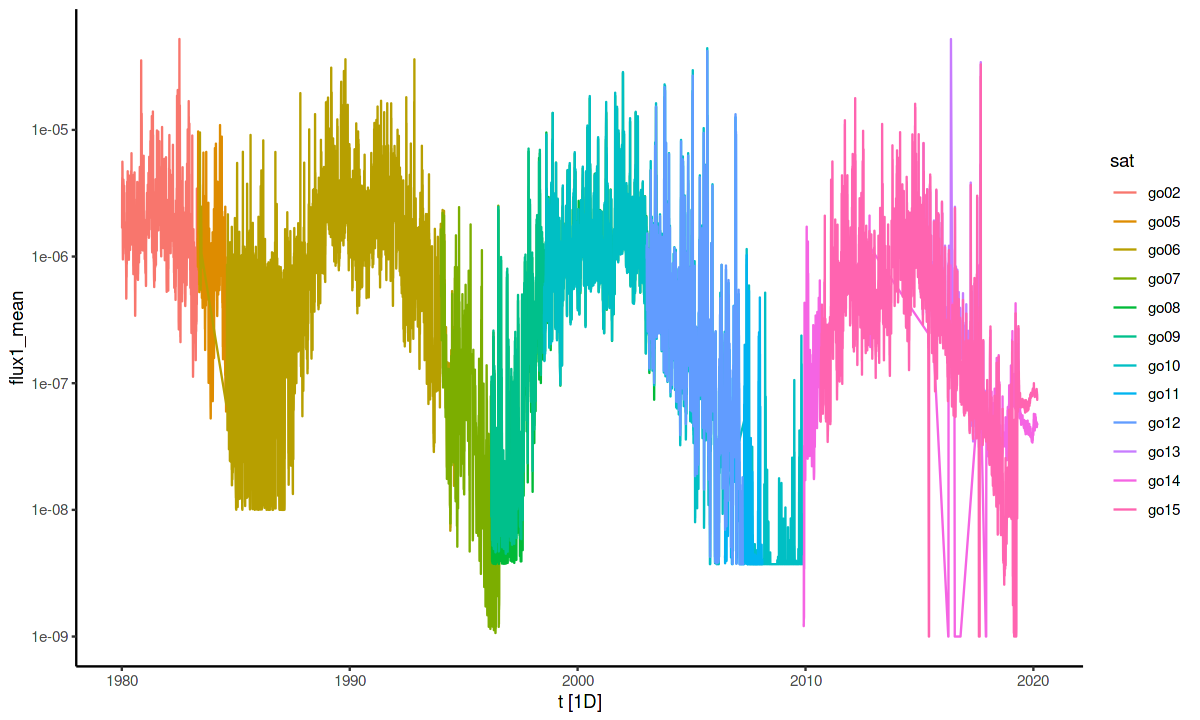

In [72]:
goes_daily_ts %>% autoplot(flux1_mean) + scale_y_log10()

## Quiz ü§∑  
Sometime in 2012 there was an [X-class solar flare](https://svs.gsfc.nasa.gov/10109/) event. When did it happen?

A. March 7<br/>
B. December 25<br/>
C. October 23<br/>
D. July 6<br/>

In [21]:
# 2012 solar flare?

## Quiz ü§∑  
When was the highest recorded solar output in the last 20 years?

A. September 6, 2017<br/>
B. January 10, 1864<br/>
C. July 27, 1983<br/>
D. September 26, 1982<br/>

In [36]:
# solar activity

## Quiz ü§∑
According to the data, what's the probability that yesterday's daily maximum solar output is higher than today's daily maximum?

A. About 1/2<br/>
B. Significantly >1/2 <br/>
C. Significantly <1/2 <br/>

In [37]:
# Probability

## Quiz ü§∑
On average, is the daily median `log10(flux1)` increasing or decreasing over the past 45 years? By how much?

A. Decreasing by about .0006 per year.<br/>
B. Increasing by about .001 per year.<br/>
C. No significant change.<br/>

In [58]:
# change per year

## Quiz ü§∑
How does the *variance* in solar output compare for the current solar cycle ([S24](https://en.wikipedia.org/wiki/Solar_cycle_24_)) versus the last ([S23](https://en.wikipedia.org/wiki/Solar_cycle_23))?

A. Greater.<br/>
B. Less.<br/>
C. No significant change.<br/>

In [300]:
# variance in solar output

## Decomposing the solar cycle
Can we learn from data that the solar cycle is ~11 years long?

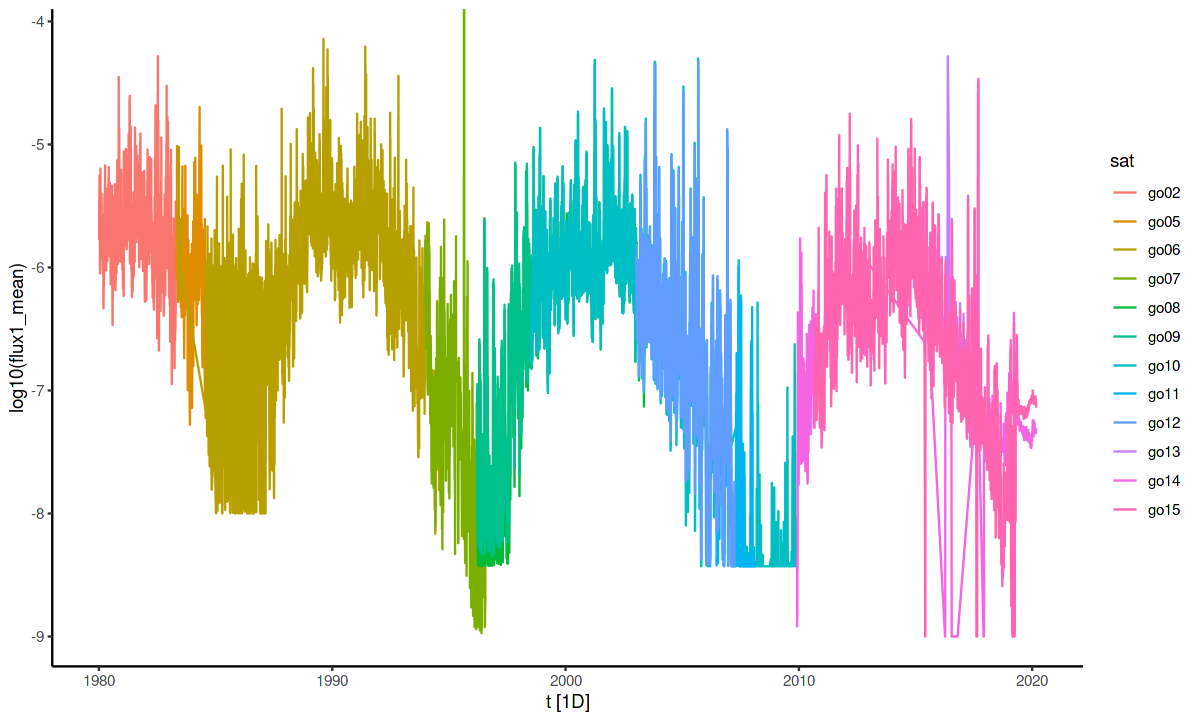

In [60]:
goes_daily_ts %>% autoplot(log10(flux1_mean))

In [376]:
goes_daily_ts1 %>% 
    fill_gaps %>% 
    fill(flux1, flux2) %>% 
    filter(year(date) == 2005, month(date) == 11, day(date) == 16)

date       flux1        flux2       
1 2005-11-16 6.764132e-07 4.619255e-08

In [68]:
smooth_goes <- function(k) {
    goes_daily_ts %>%
        fill_gaps %>% 
        fill(flux1_med) %>% 
        mutate(slf1 = slide_dbl(log10(flux1_med), \(x) mean(x, na.rm=T), .before=k, .after=k))
}

[1] 4015

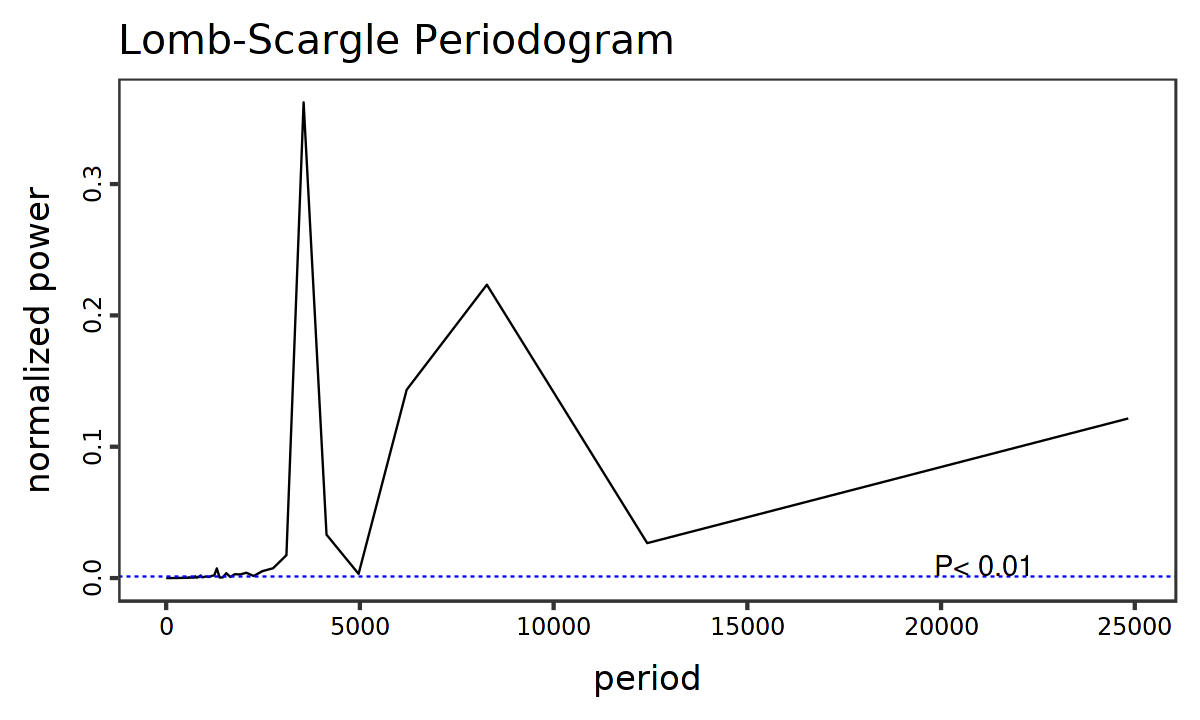

In [73]:
library(slider)
library(lomb)
smooth_goes(1000) %>% pluck('slf1') %>% lsp(type = "period")

11 * 365

## Other types of decompositions

There are some well-known decompositions that analysts often apply to time-series data. We'll look at two:
- Classical decomposition
- STL

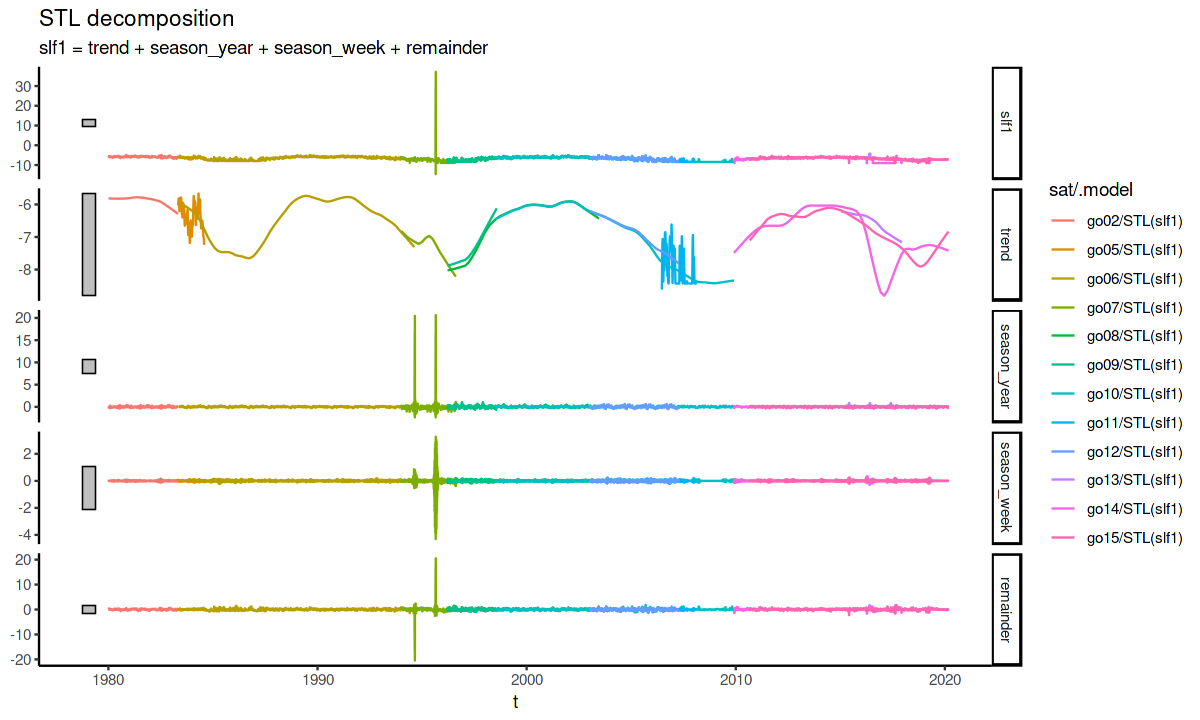

In [70]:
smooth_goes(0) %>% model(STL(slf1))  %>% 
    components %>% autoplot

## STL decomposition
STL decomposes the time series into *s*easonal and *t*rend (using a *L*OESS smoother).

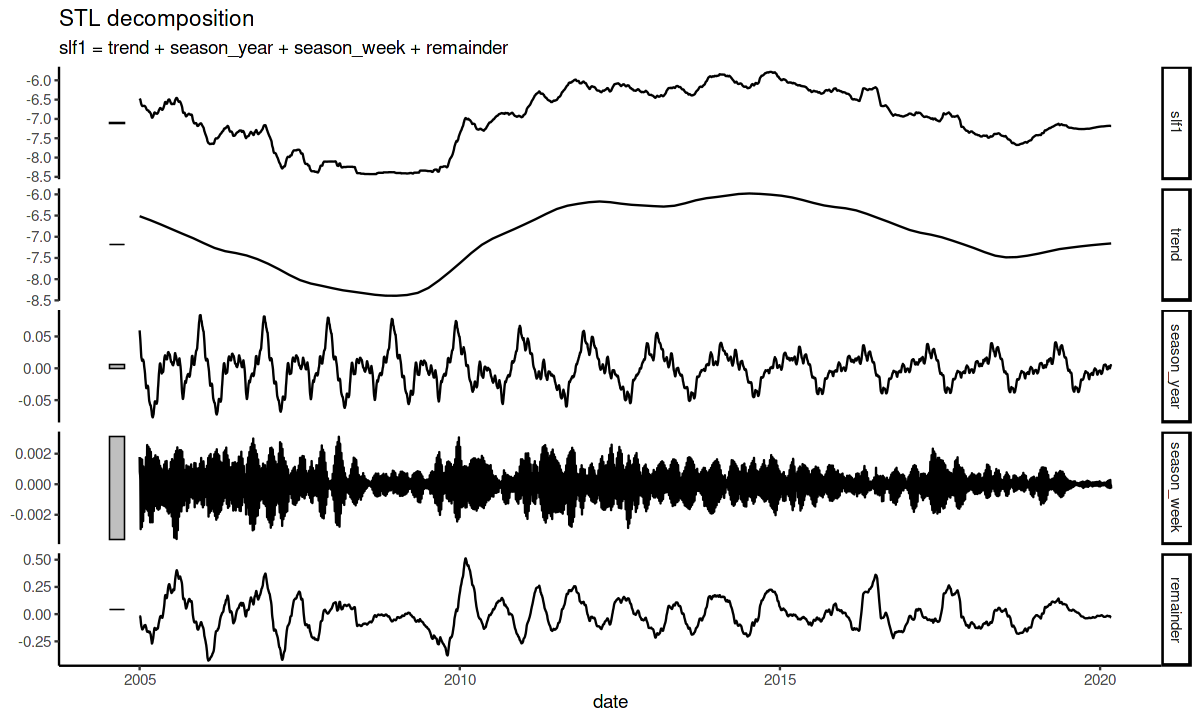

In [281]:
smooth_goes(50) %>% model(STL(slf1)) %>% 
    components %>% autoplot

## Autocorrelations
An autocorrelation plot shows the amount of correlation between a time series and its lags. It can be used to diagnose whether there are seasonal or trend components, since:
- When data have a trend, the correlations for small lags tend to be large and positive (why?) => AFC will have positive values that slowly decrease with lag length.
- When data are seasonal, the autocorrelations will be larger at multiples of the seasonal period.

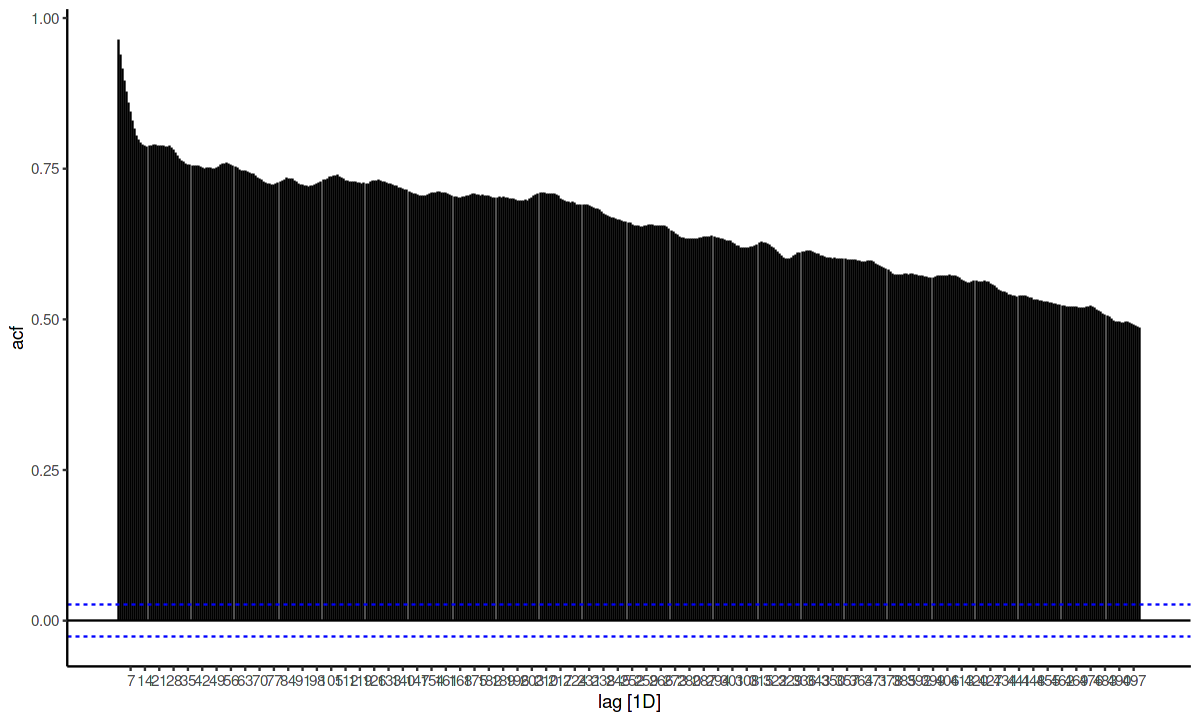

In [405]:
smooth_goes(0) %>% ACF(slf1, lag_max=500) %>% autoplot

## The Hurst coefficient
The [Hurst exponent](https://en.wikipedia.org/wiki/Hurst_exponent) $H$ measures how much "memory" a time series has:

- $H\in[0.5,1]$ indicates a time series with long-term positive autocorrelation: a high value tends to be followed by another high value and that future excursions to more high values do occur. 
- $H\in[0,0.5]$ indicates a time series with long-term switching between high and low values in adjacent pairs, meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high
- A value of $H\approx 0.5$ indicates short-memory, with (absolute) autocorrelations decaying exponentially quickly to zero.

In [410]:
smooth_goes(1000) %>% features(flux1, coef_hurst)

coef_hurst
1 0.9384903

In [306]:
 %>% features(slf1, coef_hurst)

coef_hurst
1 0.99986

## Predicting solar flares

Can we predict the occurrence of solar flares using these data? Recall how we classify different solar flares:

https://en.wikipedia.org/wiki/Solar_flare#Classification

In [93]:
goes_daily_ts %>% mutate(flare = cut(log10(flux2_max), breaks=c(-Inf, -7:-4, Inf), 
                                     labels=c("A", "B", "C", "M", "X"))) %>% xtabs(~ flare, .)

flare
    A     B     C     M     X 
10173  5249  3317  2101   185 

In [86]:
table(goes_daily_ts$flare)

Warning message:
‚ÄúUnknown or uninitialised column: `flare`.‚Äù


< table of extent 0 >

[1] -7 -6 -5 -4